Analysis:

1. There is a trend in temperature and latitude as the temperature is signifantly warmer near the 0deg Latitude which is the equator. The equator however is not the location with the highest temperature as cities located at the 20 degree latitude mark had the highest temperature. This may be due to the current season.

2. There is no real strong correlation between latitude and cloudiness. 

3. There is no real strong correlation between wind speed and latitude. There are some outliers as there is few data that has high wind storm but that could be due to extreme cases that are not indicative of any trends.

In [47]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

In [49]:
#Create DataFrame
city_df = pd.DataFrame(cities)
city_df.columns = ["City"]
city_df["Country"] = ""
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Temperature (F)"] = ""
city_df["Humidity (%)"] = ""
city_df["Cloudiness (%)"] = ""
city_df["Wind Speed (mph)"] = ""
city_df.head()

,City,Country,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,barentsburg,,,,,,,
1,punta arenas,,,,,,,
2,port elizabeth,,,,,,,
3,kuche,,,,,,,
4,nikolskoye,,,,,,,


In [50]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

row_count = 1

print("Beginning Data Retrieval")
print("----------------------------")

for index, row in city_df.iterrows():
    city = row["City"]
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
    city_data = requests.get(query_url).json()
    
    try:    
        city_df.loc[index, "Country"] = city_data["sys"]["country"]
        city_df.loc[index, "Lat"] = city_data["coord"]["lat"]
        city_df.loc[index, "Lng"] = city_data["coord"]["lon"]
        city_df.loc[index, "Temperature (F)"] = city_data["main"]["temp"]
        city_df.loc[index, "Humidity (%)"] = city_data["main"]["humidity"]
        city_df.loc[index, "Cloudiness (%)"] = city_data["clouds"]["all"]
        city_df.loc[index, "Wind Speed (mph)"] = city_data["wind"]["speed"]
        print("Processing City #", row_count, "|", city_data["name"])
        row_count += 1
    except (KeyError, IndexError):
            print("City not found. Skipping...")
        
print("----------------------------")
print("Data Retrieval Complete ")
print("----------------------------")

Beginning Data Retrieval
----------------------------
City not found. Skipping...
Processing City # 1 | Punta Arenas
Processing City # 2 | Port Elizabeth
City not found. Skipping...
Processing City # 3 | Nikolskoye
Processing City # 4 | Coquimbo
Processing City # 5 | Beringovskiy
Processing City # 6 | Flin Flon
Processing City # 7 | Hanna
City not found. Skipping...
Processing City # 8 | Fairbanks
Processing City # 9 | Hilo
Processing City # 10 | Havre-Saint-Pierre
Processing City # 11 | Ushuaia
Processing City # 12 | Qaanaaq
Processing City # 13 | Bethel
Processing City # 14 | Faanui
Processing City # 15 | Huilong
Processing City # 16 | Deputatskiy
Processing City # 17 | New Norfolk
Processing City # 18 | Tasiilaq
Processing City # 19 | Agua Prieta
Processing City # 20 | Rikitea
Processing City # 21 | Losheim
Processing City # 22 | Hobart
Processing City # 23 | Solnechnyy
Processing City # 24 | At-Bashi
Processing City # 25 | Ribeira Grande
Processing City # 26 | Arraial do Cabo
Proce

Processing City # 221 | Semey
Processing City # 222 | Srednekolymsk
Processing City # 223 | Lompoc
Processing City # 224 | Saint-Joseph
Processing City # 225 | Zabid
Processing City # 226 | Touros
Processing City # 227 | Longjiang
Processing City # 228 | Maseru
City not found. Skipping...
Processing City # 229 | Mayo
Processing City # 230 | Santa Isabel do Rio Negro
Processing City # 231 | Mar del Plata
Processing City # 232 | Solginskiy
Processing City # 233 | Romny
Processing City # 234 | Isangel
Processing City # 235 | Constitucion
Processing City # 236 | Yushu
Processing City # 237 | Ponta Delgada
City not found. Skipping...
City not found. Skipping...
Processing City # 238 | Manhush
Processing City # 239 | Del Rio
Processing City # 240 | Qaqortoq
City not found. Skipping...
Processing City # 241 | Hofn
Processing City # 242 | Praia da Vitoria
Processing City # 243 | Padang
Processing City # 244 | Pringsewu
City not found. Skipping...
Processing City # 245 | Chuka
Processing City #

Processing City # 444 | Golden Gate
Processing City # 445 | Buala
Processing City # 446 | Dubbo
Processing City # 447 | Gourcy
Processing City # 448 | Alice Springs
Processing City # 449 | Erzincan
Processing City # 450 | Nhulunbuy
Processing City # 451 | San Jeronimo
Processing City # 452 | Grand Gaube
Processing City # 453 | Verkhnevilyuysk
Processing City # 454 | Clarksburg
Processing City # 455 | Taoudenni
Processing City # 456 | Adrar
Processing City # 457 | Rapar
Processing City # 458 | Ust-Tsilma
Processing City # 459 | Nelson Bay
Processing City # 460 | Pandan
Processing City # 461 | Tambacounda
Processing City # 462 | Sulangan
Processing City # 463 | Zheleznodorozhnyy
Processing City # 464 | Ust-Kuyga
Processing City # 465 | Bilibino
Processing City # 466 | Roald
Processing City # 467 | Craig
Processing City # 468 | Kilindoni
Processing City # 469 | Mount Pleasant
Processing City # 470 | Bonthe
Processing City # 471 | Pastavy
Processing City # 472 | Mitsamiouli
Processing City

In [51]:
#Check City Count
city_df.count()

City                591
Country             591
Lat                 591
Lng                 591
Temperature (F)     591
Humidity (%)        591
Cloudiness (%)      591
Wind Speed (mph)    591
dtype: int64

In [52]:
# Save DataFrame to CSV and Display
city_df = city_df.reset_index()
del city_df["index"]
city_df.to_csv("WeatherPy.csv")
city_df.head()

,City,Country,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,barentsburg,,,,,,,
1,punta arenas,CL,-53.16,-70.91,41,100,75,5.82
2,port elizabeth,US,39.31,-74.98,79.45,74,90,9.17
3,kuche,,,,,,,
4,nikolskoye,RU,59.7,30.79,55.4,93,75,15.66


In [53]:
city_df.replace("", np.nan, inplace=True)
city_df = city_df.dropna()
city_df.head(10)

,City,Country,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,punta arenas,CL,-53.16,-70.91,41.00,100.0,75.0,5.82
2,port elizabeth,US,39.31,-74.98,79.45,74.0,90.0,9.17
4,nikolskoye,RU,59.70,30.79,55.40,93.0,75.0,15.66
5,coquimbo,CL,-29.95,-71.34,60.80,67.0,20.0,14.99
6,beringovskiy,RU,63.05,179.32,41.00,100.0,0.0,10.22
7,flin flon,CA,54.77,-101.88,37.40,93.0,90.0,8.05
8,hanna,CA,51.64,-111.93,39.47,99.0,88.0,5.30
10,fairbanks,US,64.84,-147.72,48.02,92.0,75.0,4.07
11,hilo,US,19.71,-155.08,73.94,84.0,90.0,10.29
12,havre-saint-pierre,CA,50.23,-63.60,44.60,93.0,90.0,6.93


In [54]:
city_df["Lat"] = city_df["Lat"].astype(float)
city_df["Lng"] = city_df["Lng"].astype(float)
city_df["Temperature (F)"] = city_df["Temperature (F)"].astype(float)
city_df["Humidity (%)"] = city_df["Humidity (%)"].astype(float)
city_df["Cloudiness (%)"] = city_df["Cloudiness (%)"].astype(float)
city_df["Wind Speed (mph)"] = city_df["Wind Speed (mph)"].astype(float)
city_df.dtypes

City                 object
Country              object
Lat                 float64
Lng                 float64
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

In [61]:
Date = time.strftime("(%m/%d/%Y)")
Date

'(09/17/2018)'

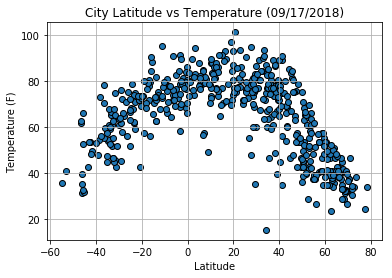

In [72]:
#Scatter Plot for Latitude vs Temperature

plt.scatter(city_df["Lat"], city_df["Temperature (F)"], edgecolor = "black")

plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs Temperature" + " " +  str(Date))

plt.savefig("Latitude vs Temperature Image.png")
plt.show()

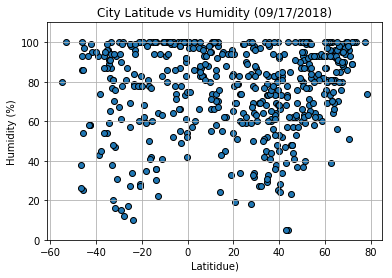

In [73]:
#Scatter Plot for Latitude vs Humidity
plt.scatter(city_df["Lat"], city_df["Humidity (%)"], edgecolor = "black")

plt.grid(True)
plt.xlabel("Latitidue)")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity" + " " +  str(Date))
plt.ylim(0, 110)

plt.savefig("Latitude vs Humidity.png")
plt.show()

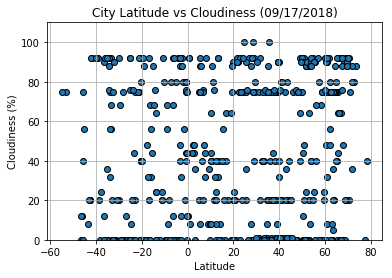

In [74]:
#Scatter Plot for Latitude vs Cloudiness
plt.scatter(city_df["Lat"], city_df["Cloudiness (%)"], edgecolor = "black")

plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness" + " " +  str(Date))
plt.ylim(0, 110)

plt.savefig("Latitude vs Cloudiness.png")
plt.show()

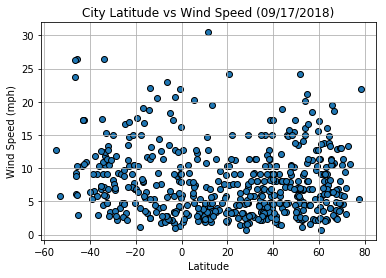

In [75]:
#Scatter Plot for Latitude vs Wind Speed
plt.scatter(city_df["Lat"], city_df["Wind Speed (mph)"], edgecolor = "black")

plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed" + " " +  str(Date))

plt.savefig("Latitude vs Wind Speed.png")
plt.show()